# Summary notebook of the current progress
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Content**
1. <span style="color:yellow">Generate one correlation matrix from complete time series data of one subject using phase randomisation. (2)
2. <span style="color:yellow">Generate n correlation matrices from a slices time series to explore time dynamics (3)
3. <span style="color:green">From the correlation matrix, compute the Euler characteristic, Euler entropy, Shannon entropy and clique complex
4. <span style="color:green">Following up on Fernando's paper 'topological phase transitions in functional brain networks', try to find similar phase transitions in this data.
5. <span style="color:green">From the clique complex, generate the inverse connectivity matrix $L^{-1}$ as required by Knill's calculation
6. <span style="color:green">From $L^{-1}$, compute the free energy for that specific datasubset, i.e. subject/timeseries slice/brain region etc..
7. <span style="color:yellow">Order the data according to age, or some other variable like time, sex, pathology, threshold etc., to explore topological biomarkers. (1)
8. <span style="color:yellow">Explore the Euler Characteristic and free energy as a function of time by slicing the time series. (4)

**Run before using the notebook**

In [1]:
# Import necessary libraries
import numpy as np
import networkx as nx
import glob

# Import external background functions
%run functionals.py
%run Concept_codes/TDA.py

C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\functionals.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Import HCP data
# Importing all matrices with Numpy
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

# Generate an averaged matrix
MatAv = np.zeros(shape=matrices[0].shape)
for matrix in matrices:
    MatAv += matrix
averaged_matrix = MatAv/len(matrices)

#### 1. <span style="color:yellow">Generate one correlation matrix from complete time series data of one subject using phase randomisation.

In [ ]:
/ # Wait for Fernando's coding tips

#### 2. <span style="color:yellow">Generate n correlation matrices from a slices time series to explore time dynamics

In [ ]:
/ # First get 1. working

#### 3. Compute $\chi$, $S_{Shannon}$ and clique complex
From the correlation matrix, compute the Euler characteristic, Euler entropy, Shannon entropy and clique complex

In [3]:
# Define desired settings
cutoff=0.4 # Value between 0 and 1. Values below this value are set to zero. Later to be improved by using phase randomisation
max_dim=4
M = averaged_matrix

The clique complex, Euler Characteristic and Shannon entropy below are all computed individually. That is, they should be integrated into one function if they are all desired simultaneously, since now the computation happens three times.

In [69]:
# Generate clique complex
# Using Danillo's code

#%time clique_complex_Danillo = list(cliques_gudhi_matrix_comb(M,(1-cutoff),max_dim))
#print(len(clique_complex_Danillo))
#print(len(M))

Code below seems to be quicker, sure? Check with Danillo if they do they same. Also, cliques_gudhi_matrix_combi does not seem to return correct clique_complex, since cutoff=0,max_dim=1 should return 177 cliques, i.e. only nodes. Right?

In [4]:
# Generate clique complex
# Using connection_matrix.ipynb code
%time clique_complex = build_clique_complex(M, cutoff, max_dim)
print(len(clique_complex))
print(len(M))

CPU times: total: 15.6 ms
Wall time: 18.9 ms
1919
177


In [5]:
# Compute the Euler Characteristic
%time euler_result = compute_euler(M,cutoff,max_dim)

euler_characteristic = euler_result[0]
clique_complex = euler_result[1]

CPU times: total: 15.6 ms
Wall time: 10.6 ms


In [ ]:
# Compute the Shannon Entropy --> Do I need this?
%time shannon_entropy = compute_shannon_entropy(M,cutoff,max_dim)

#### 4. Explore topological phase transition of $\chi$ for varying $\epsilon$
Following up on Fernando's paper 'topological phase transitions in functional brain networks', try to find similar phase transitions in this data.

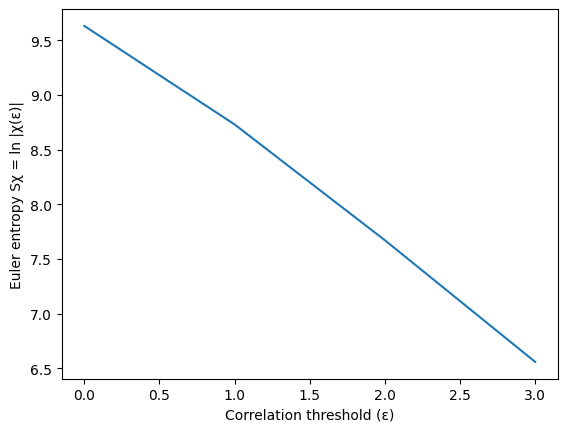

In [6]:
# Plot the Euler entropy for a given threshold interval
# Using Danillo's function

max_dim=2
maxvalue = 0.4
euler_entropy_list = []

for cutoff in np.arange(0, maxvalue, 0.1):
    euler_characteristic = compute_euler(M,cutoff,max_dim)[0]
    euler_entropy_list.append(np.log(abs(euler_characteristic)))

plt.plot(euler_entropy_list)
plt.xlabel('Correlation threshold (ε)')
plt.ylabel('Euler entropy Sχ = ln |χ(ε)|')
plt.show()

Compare to Fernando's code

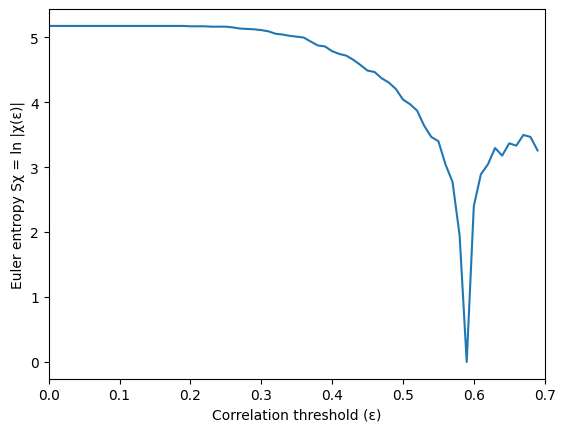

In [7]:
# Plot the Euler entropy for a given threshold interval
# Using Fernando's function
maxvalue = 70

plt.plot(np.log(np.abs(Eulerchoice_thr(M, maxvalue, 0))))
plt.xlabel('Correlation threshold (ε)')
plt.ylabel('Euler entropy Sχ = ln |χ(ε)|')
locs, labels = plt.xticks()
plt.xticks(locs, list(locs/100))
plt.xlim(0, maxvalue)
plt.show()

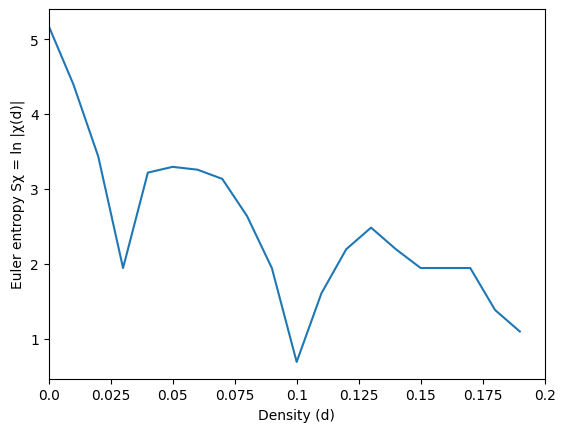

In [8]:
# Euler entropy (Sχ = ln|χ|) as a function of the correlation density level.
# Using Fernando's function

plotEuler_den(M, 20)

Fernando's function works fastest, so proceed to check for larger dataset. Use the thresholding, instead of the density to improve speed.

In [9]:
# Extended plot for the Euler entropy for a given threshold interval
data_size = 10 # amount of matrices
maxvalue = 60
entropy_list = []

for matrix in matrices[:data_size]:
    entropy = np.log(np.abs(Eulerchoice_thr(matrix, maxvalue, 0)))
    entropy_list.append(entropy)

entropy_averaged = [sum(x) / data_size for x in zip(*entropy_list)]

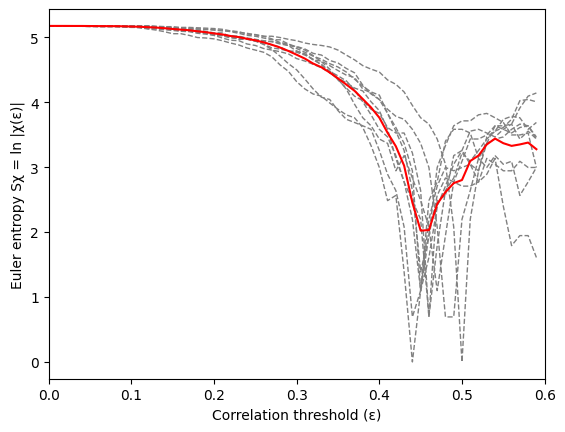

In [10]:
# Plot averaged entropy
for i in range(0, len(entropy_list)):
    plt.plot(entropy_list[i], color='grey', linestyle='--', linewidth=1)
plt.plot(entropy_averaged, 'r-')
plt.xlabel('Correlation threshold (ε)')
plt.ylabel('Euler entropy Sχ = ln |χ(ε)|')
locs, labels = plt.xticks()
plt.xticks(locs, list(locs/100))
plt.xlim(0, maxvalue)
plt.show()

#### 5. Generate inverse connectivity matrix $L^{-1}$

From the clique complex, generate the inverse connectivity matrix $L^{-1}$ as required by Knill's calculation.

First convert the clique complex to make it compatible with the consecutive code. Then generate $L$ from the clique complex. Lastly, invert this matrix to obtain the desired $L^{-1}$ inverse connectivity matrix.

In [11]:
# Generate the connectivity matrix L from the clique complex
%time inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)

CPU times: total: 1.42 s
Wall time: 1.39 s


#### 6. Minimise the Internal Energy and maximise entropy
Minimise energy by adjusting the probability distribution using Simulated Annealing. First test if Simulated Annealing actually converges towards minimum energy and maximum entropy for a small matrix. Then test if this optimisation is feasible for realistic matrix size. 

In [12]:
# Give a test matrix
test_matrix = np.array(([1,2,3],[2,3,4],[4,5,6]))
#np.random.rand(3, 3)

In [13]:
# Generate max entropies and min energies using Simulated Annealing
%time entropies, average_entropy, energies, average_energy = simulated_annealing(test_matrix, num_runs=100, num_iterations_energy=10000, num_iterations_entropy=1000)

C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\functionals.py:39: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


CPU times: total: 5.67 s
Wall time: 18.2 s


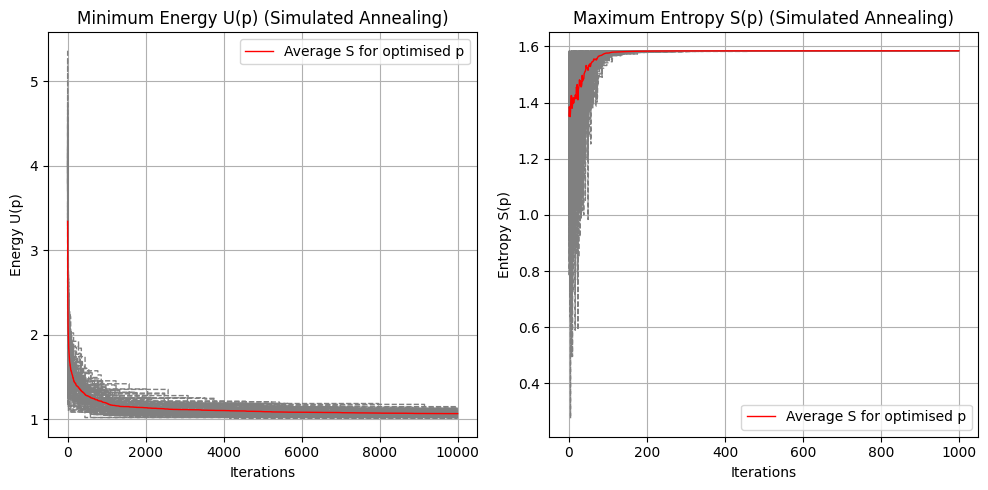

In [14]:
# Plot the results
plot_SA_data(entropies, average_entropy, energies, average_energy)

From the plots above it is shown that the minimum energy and maximum entropy are optimised using the simulated annealing technique. From this, we assume that we can use the simulated annealing method from here on. Now try this method for a large dataset of a size close to the real data.

In [15]:
# Generate a larger test matrix of realistic size for one run
test_matrix = generate_symmetric_binary_matrix(1000)

In [16]:
# Generate max entropies and min energies using Simulated Annealing
%time entropies, average_entropy, energies, average_energy = simulated_annealing(test_matrix, num_runs=1, num_iterations_energy=1000, num_iterations_entropy=1000)

CPU times: total: 4.31 s
Wall time: 5.67 s


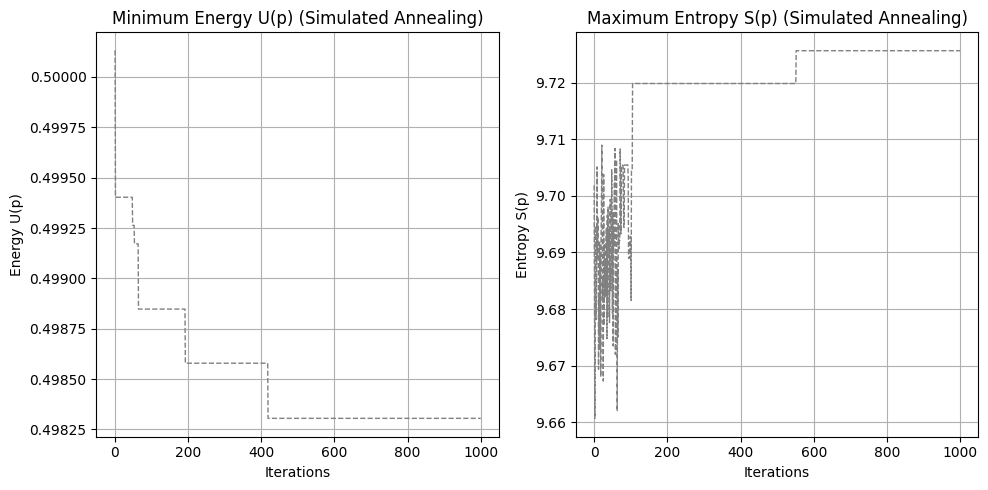

In [44]:
# Plot the results
plot_SA_data(entropies, None, energies, None)

#### 7. Compute Free Energy 

From $L^{-1}$, compute the Helmholtz free energy for the specific datasubset, i.e. subject/timeseries slice/brain region etc. The maximum entropy S(p) and minimum internal unergy U(p) need to be found to compute the Helmholtz free energy F(p), like:

$F(p) = U(p) - \Beta S(p)$

Where $\Beta = \frac{1}{k_B T}$ represents the temperature influence, which is set to be constant of value 1. The value of this constant is irrelevant because we are only interested in energy differences and not absolute energies themselfs. The minimum energy is acquired by using Simulated Annealing to find the probability distribution for which U(p) is minimised. The maximum entropy is assumed to be required when the probability distribution is uniform. However, the code allows for Simulated Annealing to apply on the Entropy as well if necessary.

In [17]:
# Compute the Helmholtz free energy
%time free_energy = free_energy(inverse_connectivity_matrix, 1)

CPU times: total: 14.1 s
Wall time: 22.9 s
